In [1]:
import csv
import pandas as pd
import numpy as np
import math

In [36]:
patient_data = './coronavirusdataset/patient.csv'
route_data = './coronavirusdataset/route.csv'
time_data = './coronavirusdataset/time.csv'

with open(patient_data, errors='ignore') as f:
    patient = pd.read_table(f, delimiter=',', sep=',')    
index=list(range(len(patient)))
df_patient = pd.DataFrame(patient, index=index)

with open(route_data, errors='ignore') as f:
    route = pd.read_table(f, delimiter=',', sep=',')    
index=list(range(len(patient)))
df_route = pd.DataFrame(route, index=index)

with open(time_data, errors='ignore') as f:
    time = pd.read_table(f, delimiter=',', sep=',')    
index=list(range(len(time)))
df_time = pd.DataFrame(time, index=index)

state_label=[]
for k in df_patient['state']:
    if k == 'isolated':
        state_label.append(0)
    elif k == 'released':
        state_label.append(1)
    elif k == 'deceased':
        state_label.append(2)

df_patient['state_label'] = state_label

df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['disease'], prefix='disease')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['sex'], prefix='sex')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['country'], prefix='country')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['region'], prefix='region')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['group'], prefix='group')], axis=1)
df_patient = pd.concat([df_patient, pd.get_dummies(df_patient['infection_reason'], prefix='infection_reason')], axis=1)
df_patient = df_patient.drop(['state','patient_id','disease','sex','country','region','group','infection_reason'], axis=1)

df_patient['released_date'] = pd.to_datetime(df_patient['released_date'])
df_patient['deceased_date'] = pd.to_datetime(df_patient['deceased_date'])
df_patient['confirmed_date'] = pd.to_datetime(df_patient['confirmed_date'])

df_patient = df_patient.drop(['released_date', 'deceased_date','confirmed_date'], axis=1)
df_patient = df_patient.drop(['infection_order', 'infected_by', 'contact_number','birth_year'], axis=1)

cols = list(df_patient)
cols.insert(0, cols.pop(cols.index('state_label')))
# print(cols)
df_patient = df_patient.loc[:, cols]
df_patient = df_patient.dropna(axis=0)

# print(df_patient['state'])
print(df_patient.info(1))
print(df_patient.head(0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7869 entries, 0 to 7868
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   state_label                                         7869 non-null   int64
 1   disease_1.0                                         7869 non-null   uint8
 2   sex_female                                          7869 non-null   uint8
 3   sex_male                                            7869 non-null   uint8
 4   country_China                                       7869 non-null   uint8
 5   country_Korea                                       7869 non-null   uint8
 6   country_Mongolia                                    7869 non-null   uint8
 7   region_Busan                                        7869 non-null   uint8
 8   region_Chungcheongbuk-do                            7869 non-null   uint8
 9   region_Chungcheongn

In [37]:
col_names = []
for i in df_patient.head(0):
    col_names.append(i)
    
print(col_names)

['state_label', 'disease_1.0', 'sex_female', 'sex_male', 'country_China', 'country_Korea', 'country_Mongolia', 'region_Busan', 'region_Chungcheongbuk-do', 'region_Chungcheongnam-do', 'region_Daegu', 'region_Daejeon', 'region_Gangwon-do', 'region_Gwangju', 'region_Gyeongsangbuk-do', 'region_Jeju-do', 'region_Jeollabuk-do', 'region_Jeollanam-do', 'region_Ulsan', 'region_capital area', 'region_filtered at airport', 'group_Cheongdo Daenam Hospital', "group_Eunpyeong St. Mary's Hospital", 'group_Pilgrimage', 'group_Shincheonji Church', 'infection_reason_contact with patient', 'infection_reason_contact with patient in Daegu', 'infection_reason_contact with patient in Japan', 'infection_reason_contact with patient in Singapore', 'infection_reason_pilgrimage to Israel', 'infection_reason_residence in Wuhan', 'infection_reason_visit to China', 'infection_reason_visit to Daegu', 'infection_reason_visit to Italy', 'infection_reason_visit to Japan', 'infection_reason_visit to Thailand', 'infection

In [43]:
deceased, released, isolated = np.bincount(df_patient['state_label'])
total = released + isolated + deceased 
    
weight_for_released = (1 / released)*(total)/3.0 
weight_for_isolated = (1 / isolated)*(total)/3.0
weight_for_deceased = (1 / deceased)*(total)/3.0

class_weight = {2: isolated, 1: released, 0: deceased}

print('Weight for released: {:.2f}'.format(released))
print('Weight for isolated: {:.2f}'.format(isolated))
print('Weight for deceased: {:.2f}'.format(deceased))



Weight for released: 56.00
Weight for isolated: 36.00
Weight for deceased: 7777.00


훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.992
특성 중요도:
[4.41145154e-01 5.09399816e-03 1.75909063e-02 0.00000000e+00
 2.67682679e-02 0.00000000e+00 1.03838766e-06 0.00000000e+00
 0.00000000e+00 3.33619343e-02 1.22872943e-02 0.00000000e+00
 3.50016679e-03 3.01659799e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.31454846e-02 0.00000000e+00
 1.58886624e-05 8.94863750e-03 3.94327713e-04 1.96297583e-02
 3.12673471e-02 0.00000000e+00 1.65242089e-02 1.95176916e-02
 3.59569343e-05 4.93216630e-02 0.00000000e+00 3.94729163e-03
 1.51136057e-05 3.11777527e-04 4.37166106e-02 1.92539390e-02
 1.71188945e-01 0.00000000e+00]


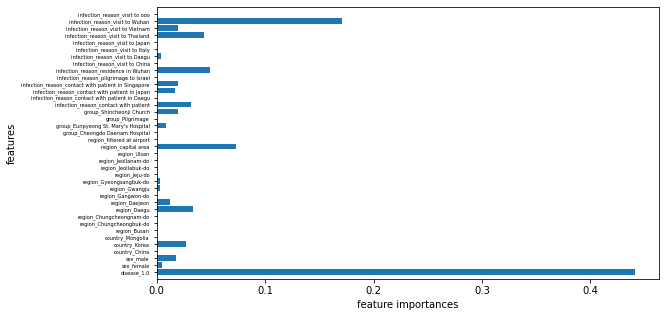

In [46]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

X = df_patient.values[:,1:]
Y = df_patient.values[:,0]     

train_X, test_X, train_Y, test_Y = train_test_split(X,Y, train_size=0.8, test_size=0.1, random_state=123)

tree1 = DecisionTreeClassifier(criterion="gini", splitter='best', max_leaf_nodes=None, min_samples_leaf=1, max_depth=None)

clf = tree1.fit(X,Y)
clf = tree1.fit(X=train_X, y=train_Y)
clf.feature_importances_ 
clf.score(X=test_X, y=test_Y) 

feature_names = col_names[1:]
class_names = ['isolated', 'released', 'deceased']

dot_data = tree.export_graphviz(clf, out_file=None, proportion=False, filled=True, 
                                feature_names=feature_names, class_names=class_names, 
                                rounded=True, special_characters=True, impurity=False)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render('./tree_corona.png')

print("훈련 세트 정확도: {:.3f}".format(clf.score(train_X, train_Y)))
print("테스트 세트 정확도: {:.3f}".format(clf.score(test_X, test_Y)))
print("특성 중요도:\n{}".format(clf.feature_importances_))

plt.rc('font', family='AppleGothic')

def plot_feature_importances(model):
    plt.figure(figsize=(9,5))
    n_features = X.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names, fontsize=5)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importances(tree1)
